In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
def threshold_sys(sig, th):
    out = np.zeros(len(sig))
    for i in range(len(sig)):
        if(sig[i] > th):
             out[i] = sig[i] - th
    return out

In [7]:
# to find power, snr
def power_snr_noisefloor(freq, psd, f_sig, fs, delw, delw_noise):    
    #index to find power
    ffro = int(2*len(freq)/fs*(f_sig - delw)) + 1
    fto = int(2*len(freq)/fs*(f_sig + delw)) + 1
    #index to find noise
    nfro1 = int(2*len(freq)/fs*(f_sig - delw_noise))+1
    nto1 = int(2*len(freq)/fs*(f_sig + delw_noise))+1
    P_sig = np.trapz(psd[ffro:fto], freq[ffro:fto])
    P_noise = np.trapz(psd[nfro1:nto1], freq[nfro1:nto1]) - P_sig
    Snr = P_sig/P_noise
    return P_sig, P_noise, Snr

def SR_matrics(sd, ens, OUT, Vswitch, fs, f, delw=5, delw_noise = 70):
    Cov_ens = 0
    psd_ens = 0
    psd_noise_ens = 0
    for e in range(ens):
        Cov_ens += np.cov(OUT[e],Vswitch)[1,0]    
        freq, psd = sc.signal.periodogram(OUT[e], fs)
        psd_ens += psd

        P_ens, NF_ens, SNR_ens = power_snr_noisefloor(freq, psd_ens/ens , f, fs, delw, delw_noise)
        
    PSD = psd_ens/ens
    PSR = P_ens
    NF = NF_ens
    SNR = SNR_ens
    COV = Cov_ens/ens

    return PSR, NF, SNR, COV

In [17]:
fs = 1e5 # sampling frequency
tp = 5 #time duration
t = np.linspace(0, tp, int(tp*fs)) #time series
f_sig = 100 # signal frequency
A_sig = 0.2 # signal amplitude
V_th = 2 #threshold
ens = 100

sd = np.arange(0.6, 4, 0.1)

In [18]:
# signal
sig = A_sig*np.sin(2*np.pi*f_sig*t)

# signal for c.c
sig_switch = 1.5*V_th*np.sin(2*np.pi*f_sig*t)
out_switch = threshold_sys(sig_switch, V_th)

#SR matric
Power = []
Snr = []
Cov = []

for i in range(len(sd)):
    OUT_ens = []
    # IN_ens = []
    for e in range(ens):
        #noise
        noise = np.random.normal(0, sd[i], len(t))
        sig_in = sig+noise
        # IN_ens.append(sig_in)

        #output
        sig_out = threshold_sys(sig_in, V_th)
        OUT_ens.append(sig_out)
    PSR, NF, SNR, COV = SR_matrics(sd[i], ens, OUT_ens, out_switch, fs, f_sig, delw=5, delw_noise = 20)
    Power.append(PSR)
    Snr.append(SNR)
    Cov.append(COV)
    
    print(f"sd = {sd[i]} done")


sd = 0.6 done
sd = 0.7 done
sd = 0.7999999999999999 done
sd = 0.8999999999999999 done
sd = 0.9999999999999999 done
sd = 1.0999999999999999 done
sd = 1.1999999999999997 done
sd = 1.2999999999999998 done
sd = 1.4 done
sd = 1.4999999999999998 done
sd = 1.5999999999999996 done
sd = 1.6999999999999997 done
sd = 1.7999999999999998 done
sd = 1.9 done
sd = 1.9999999999999996 done
sd = 2.0999999999999996 done
sd = 2.1999999999999997 done
sd = 2.3 done
sd = 2.3999999999999995 done
sd = 2.4999999999999996 done
sd = 2.5999999999999996 done
sd = 2.6999999999999997 done
sd = 2.7999999999999994 done
sd = 2.8999999999999995 done
sd = 2.9999999999999996 done
sd = 3.0999999999999996 done
sd = 3.1999999999999997 done
sd = 3.2999999999999994 done
sd = 3.3999999999999995 done
sd = 3.4999999999999996 done
sd = 3.599999999999999 done
sd = 3.6999999999999993 done
sd = 3.7999999999999994 done
sd = 3.8999999999999995 done


Text(0, 0.5, 'SNR')

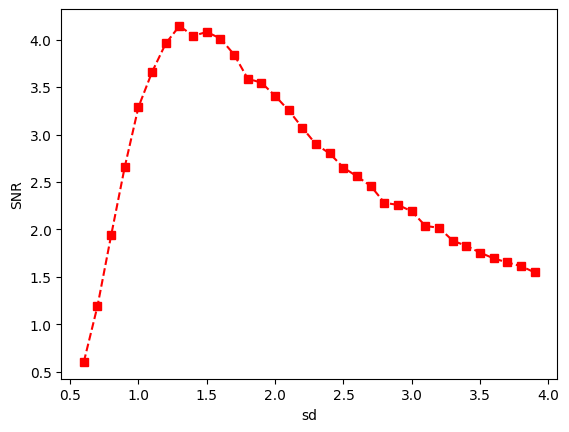

In [19]:
plt.plot(sd, Snr ,"--s", c = "red")
plt.xlabel("sd")
plt.ylabel("SNR")

In [21]:
# saving data
np.savez("SR_clipper_data2.npz", sd, ens, A_sig, f_sig, fs, tp, t, V_th, Power, Snr, Cov)